In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


sqlite3.connect('remote.db')
conn_s = sqlite3.connect('remote.db')

In [2]:
factfinance = pd.read_sql_query(f"select * from factfinance ",con=conn_s)

df = factfinance.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FinanceKey          39409 non-null  float64       
 1   DateKey             39409 non-null  float64       
 2   OrganizationKey     39409 non-null  float64       
 3   DepartmentGroupKey  39409 non-null  float64       
 4   ScenarioKey         39409 non-null  float64       
 5   AccountKey          39409 non-null  float64       
 6   Amount              39409 non-null  float64       
 7   Date                39409 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.4 MB


In [4]:
df

,FinanceKey,DateKey,OrganizationKey,DepartmentGroupKey,ScenarioKey,AccountKey,Amount,Date
0,1.0,20101229.0,3.0,1.0,1.0,60.0,22080.0,2010-12-29
1,2.0,20101229.0,3.0,1.0,2.0,60.0,20200.0,2010-12-29
2,3.0,20101229.0,3.0,1.0,2.0,61.0,2000.0,2010-12-29
3,4.0,20101229.0,3.0,1.0,1.0,61.0,2208.0,2010-12-29
4,5.0,20101229.0,3.0,1.0,1.0,62.0,1546.0,2010-12-29
...,...,...,...,...,...,...,...,...
39404,39405.0,20131228.0,13.0,7.0,1.0,42.0,225000.0,2013-12-28
39405,39406.0,20131228.0,13.0,7.0,1.0,43.0,-225000.0,2013-12-28
39406,39407.0,20131228.0,13.0,7.0,1.0,85.0,-1957.7,2013-12-28
39407,39408.0,20131228.0,13.0,7.0,1.0,92.0,17619.3,2013-12-28


In [20]:
df.FinanceKey.is_unique

True

In [7]:
df['Amount'].describe().apply(lambda x: format(x, 'f'))

count       39409.000000
mean        34475.384118
std        164041.892959
min      -1121918.000000
25%           107.140000
50%           380.000000
75%          9056.250000
max       4820988.000000
Name: Amount, dtype: object

(array([14975., 15095., 15218., 15340., 15461., 15584., 15706., 15826.,
        15949., 16071.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

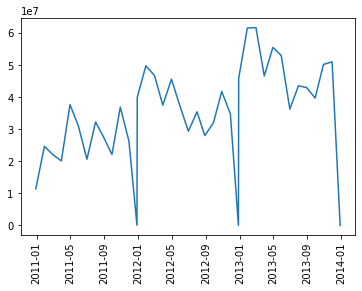

In [18]:
img = df.groupby('Date', as_index = False)['Amount'].sum()
plt.plot(img.Date, img.Amount)
plt.xticks( rotation='vertical')

In [19]:
df.FinanceKey.astype(int)

0            1
1            2
2            3
3            4
4            5
         ...  
39404    39405
39405    39406
39406    39407
39407    39408
39408    39409
Name: FinanceKey, Length: 39409, dtype: int64